In [13]:
# Based on Stevens et al. Deep learning with PyTorch, Manning Publications Co, 2020

import numpy as np
import torch
import torch.optim as optim

In [14]:
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
x = torch.tensor(x).unsqueeze(1)
y = torch.tensor(y).unsqueeze(1)
x.shape

torch.Size([11, 1])

In [15]:
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  7,  5,  8,  1,  2,  9,  0, 10]), tensor([6, 4]))

In [16]:
x_train = x[train_indices]
y_train = y[train_indices]

x_val = x[val_indices]
y_val = y[val_indices]

xn_train = 0.1 * x_train
xn_val = 0.1 * x_val

In [17]:
import torch.nn as nn

seq_model = nn.Sequential(
            nn.Linear(1, 8),
            nn.Tanh(),
            nn.Linear(8, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
[param.shape for param in seq_model.parameters()]

[torch.Size([8, 1]), torch.Size([8]), torch.Size([1, 8]), torch.Size([1])]

In [19]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([8, 1])
0.bias torch.Size([8])
2.weight torch.Size([1, 8])
2.bias torch.Size([1])


In [20]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [21]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [22]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val,
                  y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        yPred_train = model(x_train)
        loss_train = loss_fn(yPred_train, y_train)

        yPred_val = model(x_val)
        loss_val = loss_fn(yPred_val, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % (n_epochs / 10) == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [23]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    x_train = xn_train,
    x_val = xn_val, 
    y_train = y_train,
    y_val = y_val)
    
print()
print('output', seq_model(xn_val))
print('answer', y_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 221.3484, Validation loss 68.4462


Epoch 500, Training loss 13.0654, Validation loss 2.9050
Epoch 1000, Training loss 5.8885, Validation loss 7.7493
Epoch 1500, Training loss 6.6511, Validation loss 7.7173
Epoch 2000, Training loss 4.6931, Validation loss 6.6057
Epoch 2500, Training loss 3.4037, Validation loss 5.9384
Epoch 3000, Training loss 2.5494, Validation loss 5.5670
Epoch 3500, Training loss 2.0469, Validation loss 5.3899
Epoch 4000, Training loss 1.7756, Validation loss 5.3592
Epoch 4500, Training loss 1.6377, Validation loss 5.4189
Epoch 5000, Training loss 1.5667, Validation loss 5.5132

output tensor([[ 0.1831],
        [12.9955]], grad_fn=<AddmmBackward0>)
answer tensor([[ 3.],
        [11.]])
hidden tensor([[-11.0294],
        [-12.6106],
        [-12.5210],
        [  2.5086],
        [  0.0966],
        [-10.1881],
        [ -2.3200],
        [  9.8609]])


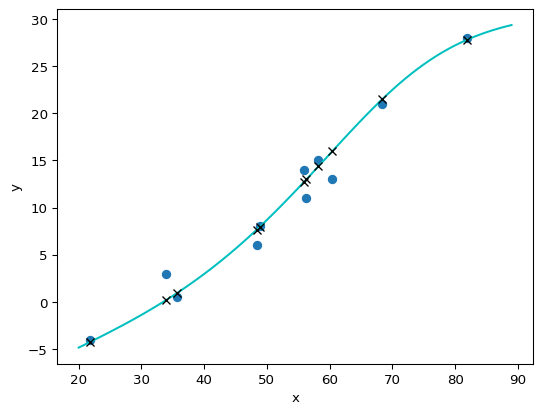

In [24]:
from matplotlib import pyplot as plt

x_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=96)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x.numpy(), y.numpy(), 'o')
plt.plot(x_range.numpy(), seq_model(0.1 * x_range).detach().numpy(), 'c-')
plt.plot(x.numpy(), seq_model(0.1 * x).detach().numpy(), 'kx')